## 🛠️ Preparação dos Dados

In [3]:
import pandas as pd

df = pd.read_csv('/content/dados_tratados.csv')
display(df.head())

,ID_Cliente,Churn,Genero,Idoso,customer.Partner,customer.Dependents,MesesCliente,TelefoneAtivo,MultiplasLinhas,TipoInternet,...,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,TipoContrato,FaturaDigital,MetodoPagamento,ValorMensal,ValorTotal,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [4]:
# Remover a coluna 'ID_Cliente'
df = df.drop('ID_Cliente', axis=1)

# Exibir as primeiras linhas do DataFrame após a remoção para verificar
display(df.head())

,Churn,Genero,Idoso,customer.Partner,customer.Dependents,MesesCliente,TelefoneAtivo,MultiplasLinhas,TipoInternet,SegurancaOnline,...,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,TipoContrato,FaturaDigital,MetodoPagamento,ValorMensal,ValorTotal,Contas_Diarias
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Churn                7043 non-null   int64  
 1   Genero               7043 non-null   object 
 2   Idoso                7043 non-null   int64  
 3   customer.Partner     7043 non-null   int64  
 4   customer.Dependents  7043 non-null   int64  
 5   MesesCliente         7043 non-null   int64  
 6   TelefoneAtivo        7043 non-null   int64  
 7   MultiplasLinhas      7043 non-null   int64  
 8   TipoInternet         7043 non-null   object 
 9   SegurancaOnline      7043 non-null   int64  
 10  BackupOnline         7043 non-null   int64  
 11  ProtecaoDispositivo  7043 non-null   int64  
 12  SuporteTecnico       7043 non-null   int64  
 13  StreamingTV          7043 non-null   int64  
 14  StreamingFilmes      7043 non-null   int64  
 15  TipoContrato         7043 non-null   o

In [8]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Criar uma cópia do DataFrame original para trabalhar
df_tratado = df.copy()

# Separar a coluna 'Genero' e as outras colunas
df_genero = df_tratado[['Genero']]
df_outras_colunas = df_tratado.drop('Genero', axis=1)

# Criar o OneHotEncoder
one_hot_enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse=False para obter um array denso

# Aplicar a transformação na coluna 'Genero'
genero_encoded = one_hot_enc.fit_transform(df_genero)

# Obter os nomes das colunas codificadas
genero_feature_names = one_hot_enc.get_feature_names_out(['Genero'])

# Converter o resultado codificado de volta para um DataFrame
df_genero_encoded = pd.DataFrame(genero_encoded, columns=genero_feature_names, index=df_tratado.index)

# Renomear as colunas codificadas para o formato desejado (Genero.F e Genero.M)
col_names_map = {
    'Genero_Female': 'Genero.F',
    'Genero_Male': 'Genero.M'
}
df_genero_encoded.rename(columns=col_names_map, inplace=True)

# Concatenar o DataFrame codificado de Gênero com as outras colunas
df_tratado = pd.concat([df_outras_colunas, df_genero_encoded], axis=1)

# Reorganizar as colunas para que 'Churn' seja a primeira, seguida por 'Genero.F' e 'Genero.M'
cols = list(df_tratado.columns)
cols.remove('Churn') # Remover 'Churn' da lista atual
cols.remove('Genero.F') # Remover 'Genero.F' da lista atual
cols.remove('Genero.M') # Remover 'Genero.M' da lista atual

# Inserir 'Churn', 'Genero.F' e 'Genero.M' no início
cols.insert(0, 'Genero.M')
cols.insert(0, 'Genero.F')
cols.insert(0, 'Churn')

df_tratado = df_tratado[cols]


# Exibir as primeiras linhas do novo DataFrame df_tratado
display(df_tratado.head())

# Verificar as colunas do novo DataFrame
print("\nColunas do novo DataFrame df_tratado:")
print(df_tratado.columns)

,Churn,Genero.F,Genero.M,Idoso,customer.Partner,customer.Dependents,MesesCliente,TelefoneAtivo,MultiplasLinhas,TipoInternet,...,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,TipoContrato,FaturaDigital,MetodoPagamento,ValorMensal,ValorTotal,Contas_Diarias
0,0,1.0,0.0,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,0.0,1.0,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,0.0,1.0,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,0.0,1.0,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,1.0,0.0,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667



Colunas do novo DataFrame df_tratado:
Index(['Churn', 'Genero.F', 'Genero.M', 'Idoso', 'customer.Partner',
       'customer.Dependents', 'MesesCliente', 'TelefoneAtivo',
       'MultiplasLinhas', 'TipoInternet', 'SegurancaOnline', 'BackupOnline',
       'ProtecaoDispositivo', 'SuporteTecnico', 'StreamingTV',
       'StreamingFilmes', 'TipoContrato', 'FaturaDigital', 'MetodoPagamento',
       'ValorMensal', 'ValorTotal', 'Contas_Diarias'],
      dtype='object')


In [13]:
# Valores únicos na coluna 'TipoInternet'
df_tratado['TipoInternet'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [20]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Para garantir que a codificação funcione corretamente,
# vamos começar com o DataFrame df que tem Genero original e TipoInternet original
# Assumimos que a coluna ID_Cliente já foi removida do df nas células anteriores.

# Criar uma cópia do DataFrame df para trabalhar nesta célula
df_current_step = df.copy()

# --- Passo 1: Codificar as colunas categóricas ---
# Identificar TODAS as colunas categóricas a serem codificadas
# Agora incluímos 'TipoContrato' e 'MetodoPagamento'
categorical_cols = ['Genero', 'TipoInternet', 'TipoContrato', 'MetodoPagamento']

# Separar as colunas categóricas e as outras colunas
df_categorical = df_current_step[categorical_cols]
df_other_cols = df_current_step.drop(columns=categorical_cols)

# Criar o OneHotEncoder
one_hot_enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Aplicar a transformação nas colunas categóricas
encoded_data = one_hot_enc.fit_transform(df_categorical)

# Obter os nomes das colunas codificadas
encoded_feature_names = one_hot_enc.get_feature_names_out(categorical_cols)

# Converter o resultado codificado para um DataFrame
df_encoded_cols = pd.DataFrame(encoded_data, columns=encoded_feature_names, index=df_current_step.index)

# Renomear as colunas codificadas de Gênero para o formato desejado (Genero.F e Genero.M)
col_names_map = {
    'Genero_Female': 'Genero.F',
    'Genero_Male': 'Genero.M'
    # Colunas de TipoInternet, TipoContrato e MetodoPagamento já terão nomes úteis padrão
}
df_encoded_cols.rename(columns=col_names_map, inplace=True)

# Concatenar o DataFrame com as colunas codificadas e as outras colunas
# A ordem das colunas será ajustada em seguida
df_tratado = pd.concat([df_other_cols, df_encoded_cols], axis=1)


# --- Passo 2: Reorganizar as colunas ---
# Reorganizar as colunas para ter 'Churn', 'Genero.F', 'Genero.M' no início
# e as colunas de TipoInternet após 'MultiplasLinhas'
# As colunas de TipoContrato e MetodoPagamento virão depois das de TipoInternet

cols = list(df_tratado.columns)

# Definir a ordem desejada das primeiras colunas
desired_order_start = ['Churn', 'Genero.F', 'Genero.M']

# Remover as colunas da ordem desejada do início da lista original para processar o restante
for col in desired_order_start:
    if col in cols:
        cols.remove(col)

# Separar as colunas codificadas por tipo (Genero já foi renomeado)
genero_cols_renamed = ['Genero.F', 'Genero.M']
internet_cols_encoded = [col for col in df_encoded_cols.columns if col.startswith('TipoInternet_')]
contrato_cols_encoded = [col for col in df_encoded_cols.columns if col.startswith('TipoContrato_')]
pagamento_cols_encoded = [col for col in df_encoded_cols.columns if col.startswith('MetodoPagamento_')]

# Remover as colunas codificadas da lista 'cols' que agora contém apenas as colunas numéricas originais
for encoded_list in [internet_cols_encoded, contrato_cols_encoded, pagamento_cols_encoded]:
    for col in encoded_list:
        if col in cols:
            cols.remove(col)

# Encontrar o índice da coluna 'MultiplasLinhas' na lista de colunas restantes (numéricas originais)
try:
    multiplas_linhas_index_in_remaining = cols.index('MultiplasLinhas')
except ValueError:
    multiplas_linhas_index_in_remaining = len(cols) -1 # Se não encontrar, coloca as colunas codificadas no final das numéricas


# Construir a lista final de colunas na ordem desejada
final_cols_order = desired_order_start # Churn, Genero.F, Genero.M
final_cols_order.extend(cols[:multiplas_linhas_index_in_remaining + 1]) # Colunas numéricas até MultiplasLinhas
final_cols_order.extend(internet_cols_encoded) # Colunas de TipoInternet
final_cols_order.extend(contrato_cols_encoded) # Colunas de TipoContrato
final_cols_order.extend(pagamento_cols_encoded) # Colunas de MetodoPagamento
final_cols_order.extend(cols[multiplas_linhas_index_in_remaining + 1:]) # Colunas numéricas após MultiplasLinhas


# Reorganizar o DataFrame
# Garantir que todas as colunas em final_cols_order existam em df_tratado antes de reindexar
final_cols_order = [col for col in final_cols_order if col in df_tratado.columns]

df_tratado = df_tratado[final_cols_order]


# Exibir as primeiras linhas do DataFrame df_tratado atualizado
display(df_tratado.head())

# Verificar as colunas do DataFrame df_tratado atualizado
print("\nColunas do DataFrame df_tratado após codificar todas as variáveis categóricas:")
print(df_tratado.columns)

,Churn,Genero.F,Genero.M,Idoso,customer.Partner,customer.Dependents,MesesCliente,TelefoneAtivo,MultiplasLinhas,TipoInternet_DSL,...,SegurancaOnline,BackupOnline,ProtecaoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,FaturaDigital,ValorMensal,ValorTotal,Contas_Diarias
0,0,1.0,0.0,0,1,1,9,1,0,1.0,...,0,1,0,1,1,0,1,65.6,593.30,2.186667
1,0,0.0,1.0,0,0,0,9,1,1,1.0,...,0,0,0,0,0,1,0,59.9,542.40,1.996667
2,1,0.0,1.0,0,0,0,4,1,0,0.0,...,0,0,1,0,0,0,1,73.9,280.85,2.463333
3,1,0.0,1.0,1,1,0,13,1,0,0.0,...,0,1,1,0,1,1,1,98.0,1237.85,3.266667
4,1,1.0,0.0,1,1,0,3,1,0,0.0,...,0,0,0,1,1,0,1,83.9,267.40,2.796667



Colunas do DataFrame df_tratado após codificar todas as variáveis categóricas:
Index(['Churn', 'Genero.F', 'Genero.M', 'Idoso', 'customer.Partner',
       'customer.Dependents', 'MesesCliente', 'TelefoneAtivo',
       'MultiplasLinhas', 'TipoInternet_DSL', 'TipoInternet_Fiber optic',
       'TipoInternet_No', 'TipoContrato_Month-to-month',
       'TipoContrato_One year', 'TipoContrato_Two year',
       'MetodoPagamento_Bank transfer (automatic)',
       'MetodoPagamento_Credit card (automatic)',
       'MetodoPagamento_Electronic check', 'MetodoPagamento_Mailed check',
       'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo',
       'SuporteTecnico', 'StreamingTV', 'StreamingFilmes', 'FaturaDigital',
       'ValorMensal', 'ValorTotal', 'Contas_Diarias'],
      dtype='object')


In [22]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Churn                                      7043 non-null   int64  
 1   Genero.F                                   7043 non-null   float64
 2   Genero.M                                   7043 non-null   float64
 3   Idoso                                      7043 non-null   int64  
 4   customer.Partner                           7043 non-null   int64  
 5   customer.Dependents                        7043 non-null   int64  
 6   MesesCliente                               7043 non-null   int64  
 7   TelefoneAtivo                              7043 non-null   int64  
 8   MultiplasLinhas                            7043 non-null   int64  
 9   TipoInternet_DSL                           7043 non-null   float64
 10  TipoInternet_Fiber optic

In [25]:
# Lista de colunas a serem convertidas para int64
cols_to_int = [
    'Genero.F',
    'Genero.M',
    'TipoInternet_DSL',
    'TipoInternet_Fiber optic',
    'TipoInternet_No',
    'TipoContrato_Month-to-month',
    'TipoContrato_One year',
    'TipoContrato_Two year',
    'MetodoPagamento_Bank transfer (automatic)',
    'MetodoPagamento_Credit card (automatic)',
    'MetodoPagamento_Electronic check',
    'MetodoPagamento_Mailed check'
]

# Converter o tipo de dados das colunas especificadas para int64
# Tentando uma abordagem alternativa para garantir a conversão
for col in cols_to_int:
    # Verifique se a coluna existe antes de tentar converter
    if col in df_tratado.columns:
        # Converte a coluna e substitui no DataFrame
        df_tratado[col] = df_tratado[col].astype('int64')
    else:
        print(f"Aviso: Coluna '{col}' não encontrada no DataFrame.")


# Verificar os tipos de dados após a conversão
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Churn                                      7043 non-null   int64  
 1   Genero.F                                   7043 non-null   int64  
 2   Genero.M                                   7043 non-null   int64  
 3   Idoso                                      7043 non-null   int64  
 4   customer.Partner                           7043 non-null   int64  
 5   customer.Dependents                        7043 non-null   int64  
 6   MesesCliente                               7043 non-null   int64  
 7   TelefoneAtivo                              7043 non-null   int64  
 8   MultiplasLinhas                            7043 non-null   int64  
 9   TipoInternet_DSL                           7043 non-null   int64  
 10  TipoInternet_Fiber optic

In [28]:
# Calcular a contagem de cada classe na coluna 'Churn'
churn_counts = df_tratado['Churn'].value_counts()

# Calcular a proporção (porcentagem) de cada classe
churn_proportions = df_tratado['Churn'].value_counts(normalize=True) * 100

# Exibir a contagem e a proporção
print("Contagem de clientes por classe de Churn:")
print(churn_counts)
print("\nProporção de clientes por classe de Churn (%):")
print(churn_proportions)

# Avaliar o desequilíbrio
print("\nAvaliação de Desequilíbrio de Classes:")
if churn_proportions.min() < 40: # Um limite comum para considerar desequilíbrio
    print("Parece haver um desequilíbrio entre as classes de Churn.")
    print("A classe minoritária representa apenas {:.2f}% dos dados.".format(churn_proportions.min()))
    print("Isso pode impactar o desempenho de modelos preditivos e pode ser necessário aplicar técnicas de balanceamento de classes.")
else:
    print("As classes de Churn parecem estar razoavelmente equilibradas.")

Contagem de clientes por classe de Churn:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporção de clientes por classe de Churn (%):
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64

Avaliação de Desequilíbrio de Classes:
Parece haver um desequilíbrio entre as classes de Churn.
A classe minoritária representa apenas 26.54% dos dados.
Isso pode impactar o desempenho de modelos preditivos e pode ser necessário aplicar técnicas de balanceamento de classes.


/tmp/ipython-input-4145623612.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')


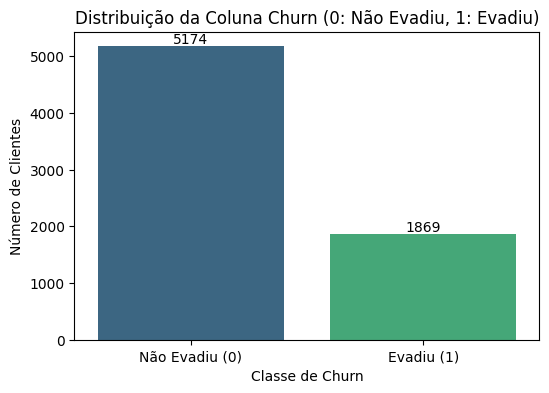

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a contagem de cada classe na coluna 'Churn'
churn_counts = df_tratado['Churn'].value_counts()

# Criar o gráfico de colunas
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')

# Adicionar rótulos e título
plt.title('Distribuição da Coluna Churn (0: Não Evadiu, 1: Evadiu)')
plt.xlabel('Classe de Churn')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['Não Evadiu (0)', 'Evadiu (1)'])

# Adicionar os valores em cima das barras para facilitar a leitura
for i, count in enumerate(churn_counts.values):
    plt.text(i, count + 50, str(count), ha='center')

plt.show()

## 🎯 Correlação e Seleção de Variáveis